In [1]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
from datetime import datetime
from pandas.tseries.offsets import *
%matplotlib inline

from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import display

In [3]:
def prefecture_labeling(x):
     #文字列をラベリング
    label_encoder = LabelEncoder()
    labels = ["北海道","青森県","岩手県","宮城県","秋田県", 
"山形県", "福島県", "茨城県","栃木県","群馬県", 
"埼玉県","千葉県","東京都","神奈川県","新潟県", 
"富山県","石川県","福井県","山梨県","長野県", 
"岐阜県","静岡県","愛知県","三重県","滋賀県", 
"京都府","大阪府","兵庫県","奈良県","和歌山県", 
"鳥取県","島根県","岡山県","広島県","山口県", 
"徳島県","香川県","愛媛県","高知県","福岡県", 
"佐賀県","長崎県","熊本県","大分県","宮崎県", 
"鹿児島県","沖縄県",'その他（海外等）']
    label_encoder.fit(labels)
    le =label_encoder.transform(x)
    
    df = pd.DataFrame(le)
    column_name = ["prefecture"]
    df.columns = column_name
    
    return df
    
def gender_labeling(x):
    
    #文字列をラベリング
    label_encoder = LabelEncoder()
    labels = ["女性","男性"]
    label_encoder.fit(labels)
    le = label_encoder.transform(x)
    
    df = pd.DataFrame(le)
    column_name = ["gender"]
    df.columns = column_name
    
    return df

In [4]:
df_ck = pd.DataFrame({
        'prefecture'  : ["北海道","青森県","岩手県","宮城県","秋田県", 
"山形県", "福島県", "茨城県","栃木県","群馬県", 
"埼玉県","千葉県","東京都","神奈川県","新潟県", 
"富山県","石川県","福井県","山梨県","長野県", 
"岐阜県","静岡県","愛知県","三重県","滋賀県", 
"京都府","大阪府","兵庫県","奈良県","和歌山県", 
"鳥取県","島根県","岡山県","広島県","山口県", 
"徳島県","香川県","愛媛県","高知県","福岡県", 
"佐賀県","長崎県","熊本県","大分県","宮崎県", 
"鹿児島県","沖縄県",'その他（海外等）'],
    })

In [5]:
df_ck

,prefecture
0,北海道
1,青森県
2,岩手県
3,宮城県
4,秋田県
5,山形県
6,福島県
7,茨城県
8,栃木県
9,群馬県


In [6]:
pre = prefecture_labeling(df_ck["prefecture"])
print(pre.shape)
pre

(48, 1)


,prefecture
0,5
1,42
2,20
3,12
4,37
5,16
6,36
7,39
8,28
9,38


データ読み込み

In [7]:
log = pd.read_csv('log.tsv',delimiter="\t")
events = pd.read_csv('events.tsv', delimiter="\t")
users = pd.read_csv('users.tsv', delimiter="\t")
os.chdir('..')

In [8]:
merge1 = pd.merge(log,events, on ="event_id") 

In [9]:
merge2 = pd.merge(merge1,users, on ="user_id")

In [10]:
merge2 = merge2.rename(columns = {"prefecture_x": "event_prefecture", "prefecture_y":"user_prefecture"})
merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,event_start_at,event_prefecture,first_published_at,female_price,male_price,interest,age,gender,user_prefecture,created_on
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,2015-03-22 14:00:00,東京都,NaN,4000.0,6500.0,NaN,34,女性,静岡県,2012-06-26
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,2017-06-11 10:00:00,埼玉県,2017-05-01 14:57:33,2000.0,6000.0,NaN,34,女性,静岡県,2012-06-26


# 特徴量を数値化

In [11]:
merge2.loc[:,"event_date"] = pd.to_datetime(merge2["event_start_at"])
merge2.loc[:,"event_year"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.year))
merge2.loc[:,"event_month"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.month))
merge2.loc[:,"event_day"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.day))
merge2.loc[:,"event_weekday"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.dayofweek))
merge2.loc[:,"event_hour"] = merge2.loc[:,"event_date"].apply(lambda x:str(x.hour))

merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,age,gender,user_prefecture,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,34,女性,静岡県,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,34,女性,静岡県,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10


In [12]:
merge2.loc[:,"user_date"] = pd.to_datetime(merge2["created_on"])
merge2.loc[:,"user_year"] = merge2.loc[:,"user_date"].apply(lambda x:str(x.year))
merge2.loc[:,"user_month"] = merge2.loc[:,"user_date"].apply(lambda x:str(x.month))
merge2.head()

,user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,female_age_lower,female_age_upper,male_age_lower,...,created_on,event_date,event_year,event_month,event_day,event_weekday,event_hour,user_date,user_year,user_month
0,1,6261,2015-03-19 09:15:50,3,1.0,クレカ,4000.0,27,39.0,27,...,2012-06-26,2015-03-22 14:00:00,2015,3,22,6,14,2012-06-26,2012,6
1,1,127600,2017-06-05 12:33:17,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
2,1,127600,2017-06-05 12:37:09,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
3,1,127600,2017-06-05 12:32:04,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6
4,1,127600,2017-06-06 09:37:45,1,NaN,NaN,NaN,24,36.0,26,...,2012-06-26,2017-06-11 10:00:00,2017,6,11,6,10,2012-06-26,2012,6


### 時間を数値化

In [13]:
merge2["time_stamp"] = pd.to_datetime(merge2["time_stamp"])
merge2["first_published_at"] = pd.to_datetime(merge2["first_published_at"])

In [14]:
features = ["female_age_lower","female_age_upper","male_age_lower","male_age_upper","event_prefecture","female_price","male_price","age", "gender", "user_prefecture","event_year", "event_month",
           "event_day","event_weekday", "event_hour", "user_year", "user_month"]
target = ["action_type"]

categorical = ["event_prefecture", "user_gender", "user_prefecture", 'event_year',"event_month","event_day","event_weekday", "event_hour", "user_year", "user_month"]

In [15]:
data =merge2[features + target]
#naの行消す
data = data.dropna()
data = data.reset_index(drop=True)
print(data.shape)
data.head()

(1442610, 18)


,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_prefecture,female_price,male_price,age,gender,user_prefecture,event_year,event_month,event_day,event_weekday,event_hour,user_year,user_month,action_type
0,27,39.0,27,39.0,東京都,4000.0,6500.0,34,女性,静岡県,2015,3,22,6,14,2012,6,3
1,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
2,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
3,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1
4,24,36.0,26,38.0,埼玉県,2000.0,6000.0,34,女性,静岡県,2017,6,11,6,10,2012,6,1


In [16]:
e_pre = prefecture_labeling(data["event_prefecture"])
e_pre.columns = "event_" + e_pre.columns.values
print(e_pre.shape)
e_pre.head()

(1442610, 1)


,event_prefecture
0,27
1,8
2,8
3,8
4,8


In [17]:
u_pre = prefecture_labeling(data["user_prefecture"])
u_pre.columns = "user_" + u_pre.columns.values
print(u_pre.shape)
u_pre.head()

(1442610, 1)


,user_prefecture
0,43
1,43
2,43
3,43
4,43


In [18]:
gen = gender_labeling(data["gender"])
print(gen.shape)
gen.head()

(1442610, 1)


,gender
0,0
1,0
2,0
3,0
4,0


In [19]:
temp = data[list(set(features+target) - set(["user_prefecture", "event_prefecture", "gender"]))]
print(temp.shape)
temp = pd.concat((temp,gen), axis = 1)
temp = pd.concat((temp,e_pre), axis = 1)
temp = pd.concat((temp,u_pre), axis = 1)

data = temp
print(data.shape)
data.head()

(1442610, 15)
(1442610, 18)


,male_age_lower,age,event_weekday,male_price,female_age_upper,female_price,event_day,user_year,female_age_lower,user_month,event_month,event_hour,action_type,male_age_upper,event_year,gender,event_prefecture,user_prefecture
0,27,34,6,6500.0,39.0,4000.0,22,2012,27,6,3,14,3,39.0,2015,0,27,43
1,26,34,6,6000.0,36.0,2000.0,11,2012,24,6,6,10,1,38.0,2017,0,8,43
2,26,34,6,6000.0,36.0,2000.0,11,2012,24,6,6,10,1,38.0,2017,0,8,43
3,26,34,6,6000.0,36.0,2000.0,11,2012,24,6,6,10,1,38.0,2017,0,8,43
4,26,34,6,6000.0,36.0,2000.0,11,2012,24,6,6,10,1,38.0,2017,0,8,43


In [20]:
data = data.astype(np.int64)

In [21]:
data["event_prefecture"].value_counts().sort_index()

1       1447
2      37476
3       2578
4      41341
5      34501
6      29237
7       2274
8      38681
9       6967
10    188971
11      4061
12     12830
13      1635
14      1977
15      7014
16       657
17       667
18      2028
19     17140
20       161
21       725
22     25894
23        71
24        79
25     91966
26      9713
27    652045
28      2761
29       300
30      4536
31      6036
32      1320
33     82921
34       460
35     61001
36      1295
37       126
38     10494
39     10923
40      7171
41     15330
42       524
43     14134
44      5827
45        66
46       219
47      5030
Name: event_prefecture, dtype: int64

# 特徴量エンジニアリング

## action_tpe=3にgender,ageはどう影響するのか。

#### 性別ごとにdata分割

In [22]:
data_M = data[data["gender"]==0]
data_F = data[data["gender"]==1]

In [23]:
print(data_M.shape)
print(data_F.shape)

(702362, 18)
(740248, 18)


男性の年齢の内訳

In [24]:
print(data_M["age"].value_counts(dropna=False, normalize=False).sort_index())  #20~55最の36通りデータ分割

20     2399
21    15731
22    26714
23    50892
24    62952
25    71602
26    70087
27    58566
28    55080
29    47951
30    46361
31    35368
32    28981
33    26812
34    23839
35    15700
36    15704
37    11493
38    12747
39     7564
40     3709
41     3109
42     2860
43     1799
44     1341
45     1284
46     1001
47      110
48      287
49      105
50      177
51       25
52        3
54        8
55        1
Name: age, dtype: int64


In [25]:
data_M = data[data["gender"]==0]
data_F = data[data["gender"]==1]

男性を年齢で分割

In [27]:
moji_1 = "data_M"
moji_2 ="= data_M[data_M['age'] == "
moji_3= "]"
for i in range(20,56):
    print (moji_1 + '%d'%i + moji_2 + '%d'%i + moji_3 ) 

data_M20= data_M[data_M['age'] == 20]
data_M21= data_M[data_M['age'] == 21]
data_M22= data_M[data_M['age'] == 22]
data_M23= data_M[data_M['age'] == 23]
data_M24= data_M[data_M['age'] == 24]
data_M25= data_M[data_M['age'] == 25]
data_M26= data_M[data_M['age'] == 26]
data_M27= data_M[data_M['age'] == 27]
data_M28= data_M[data_M['age'] == 28]
data_M29= data_M[data_M['age'] == 29]
data_M30= data_M[data_M['age'] == 30]
data_M31= data_M[data_M['age'] == 31]
data_M32= data_M[data_M['age'] == 32]
data_M33= data_M[data_M['age'] == 33]
data_M34= data_M[data_M['age'] == 34]
data_M35= data_M[data_M['age'] == 35]
data_M36= data_M[data_M['age'] == 36]
data_M37= data_M[data_M['age'] == 37]
data_M38= data_M[data_M['age'] == 38]
data_M39= data_M[data_M['age'] == 39]
data_M40= data_M[data_M['age'] == 40]
data_M41= data_M[data_M['age'] == 41]
data_M42= data_M[data_M['age'] == 42]
data_M43= data_M[data_M['age'] == 43]
data_M44= data_M[data_M['age'] == 44]
data_M45= data_M[data_M['age'] == 45]
data_M46= da

In [28]:
data_M20= data_M[data_M['age'] == 20]
data_M21= data_M[data_M['age'] == 21]
data_M22= data_M[data_M['age'] == 22]
data_M23= data_M[data_M['age'] == 23]
data_M24= data_M[data_M['age'] == 24]
data_M25= data_M[data_M['age'] == 25]
data_M26= data_M[data_M['age'] == 26]
data_M27= data_M[data_M['age'] == 27]
data_M28= data_M[data_M['age'] == 28]
data_M29= data_M[data_M['age'] == 29]
data_M30= data_M[data_M['age'] == 30]
data_M31= data_M[data_M['age'] == 31]
data_M32= data_M[data_M['age'] == 32]
data_M33= data_M[data_M['age'] == 33]
data_M34= data_M[data_M['age'] == 34]
data_M35= data_M[data_M['age'] == 35]
data_M36= data_M[data_M['age'] == 36]
data_M37= data_M[data_M['age'] == 37]
data_M38= data_M[data_M['age'] == 38]
data_M39= data_M[data_M['age'] == 39]
data_M40= data_M[data_M['age'] == 40]
data_M41= data_M[data_M['age'] == 41]
data_M42= data_M[data_M['age'] == 42]
data_M43= data_M[data_M['age'] == 43]
data_M44= data_M[data_M['age'] == 44]
data_M45= data_M[data_M['age'] == 45]
data_M46= data_M[data_M['age'] == 46]
data_M47= data_M[data_M['age'] == 47]
data_M48= data_M[data_M['age'] == 48]
data_M49= data_M[data_M['age'] == 49]
data_M50= data_M[data_M['age'] == 50]
data_M51= data_M[data_M['age'] == 51]
data_M52= data_M[data_M['age'] == 52]
data_M53= data_M[data_M['age'] == 53]
data_M54= data_M[data_M['age'] == 54]
data_M55= data_M[data_M['age'] == 55]

女性の年齢の内訳

In [29]:
print(data_F["age"].value_counts(dropna=False, normalize=False).sort_index())  #20~54,56,58の37通りデータ分割

20     1001
21     4447
22     9894
23    24565
24    45273
25    62674
26    68006
27    66978
28    60122
29    65091
30    56699
31    46508
32    39453
33    37328
34    26563
35    28874
36    19322
37    19526
38    11481
39    11389
40     9719
41     4940
42     7010
43     3977
44     2843
45     3009
46     1962
47      725
48      276
49      246
50      133
51       70
52        8
53      120
54       13
56        2
58        1
Name: age, dtype: int64


女性を年齢で分割

In [30]:
moji_1 = "data_F"
moji_2 ="= data_F[data_F['age'] == "
moji_3= "]"
for i in range(20,60):
    print (moji_1 + '%d'%i + moji_2 + '%d'%i + moji_3 ) 

data_F20= data_F[data_F['age'] == 20]
data_F21= data_F[data_F['age'] == 21]
data_F22= data_F[data_F['age'] == 22]
data_F23= data_F[data_F['age'] == 23]
data_F24= data_F[data_F['age'] == 24]
data_F25= data_F[data_F['age'] == 25]
data_F26= data_F[data_F['age'] == 26]
data_F27= data_F[data_F['age'] == 27]
data_F28= data_F[data_F['age'] == 28]
data_F29= data_F[data_F['age'] == 29]
data_F30= data_F[data_F['age'] == 30]
data_F31= data_F[data_F['age'] == 31]
data_F32= data_F[data_F['age'] == 32]
data_F33= data_F[data_F['age'] == 33]
data_F34= data_F[data_F['age'] == 34]
data_F35= data_F[data_F['age'] == 35]
data_F36= data_F[data_F['age'] == 36]
data_F37= data_F[data_F['age'] == 37]
data_F38= data_F[data_F['age'] == 38]
data_F39= data_F[data_F['age'] == 39]
data_F40= data_F[data_F['age'] == 40]
data_F41= data_F[data_F['age'] == 41]
data_F42= data_F[data_F['age'] == 42]
data_F43= data_F[data_F['age'] == 43]
data_F44= data_F[data_F['age'] == 44]
data_F45= data_F[data_F['age'] == 45]
data_F46= da

In [31]:
data_F20= data_F[data_F['age'] == 20]
data_F21= data_F[data_F['age'] == 21]
data_F22= data_F[data_F['age'] == 22]
data_F23= data_F[data_F['age'] == 23]
data_F24= data_F[data_F['age'] == 24]
data_F25= data_F[data_F['age'] == 25]
data_F26= data_F[data_F['age'] == 26]
data_F27= data_F[data_F['age'] == 27]
data_F28= data_F[data_F['age'] == 28]
data_F29= data_F[data_F['age'] == 29]
data_F30= data_F[data_F['age'] == 30]
data_F31= data_F[data_F['age'] == 31]
data_F32= data_F[data_F['age'] == 32]
data_F33= data_F[data_F['age'] == 33]
data_F34= data_F[data_F['age'] == 34]
data_F35= data_F[data_F['age'] == 35]
data_F36= data_F[data_F['age'] == 36]
data_F37= data_F[data_F['age'] == 37]
data_F38= data_F[data_F['age'] == 38]
data_F39= data_F[data_F['age'] == 39]
data_F40= data_F[data_F['age'] == 40]
data_F41= data_F[data_F['age'] == 41]
data_F42= data_F[data_F['age'] == 42]
data_F43= data_F[data_F['age'] == 43]
data_F44= data_F[data_F['age'] == 44]
data_F45= data_F[data_F['age'] == 45]
data_F46= data_F[data_F['age'] == 46]
data_F47= data_F[data_F['age'] == 47]
data_F48= data_F[data_F['age'] == 48]
data_F49= data_F[data_F['age'] == 49]
data_F50= data_F[data_F['age'] == 50]
data_F51= data_F[data_F['age'] == 51]
data_F52= data_F[data_F['age'] == 52]
data_F53= data_F[data_F['age'] == 53]
data_F54= data_F[data_F['age'] == 54]
data_F55= data_F[data_F['age'] == 55]
data_F56= data_F[data_F['age'] == 56]
data_F57= data_F[data_F['age'] == 57]
data_F58= data_F[data_F['age'] == 58]
data_F59= data_F[data_F['age'] == 59]

### 男性20代のaction_typeごとの割合

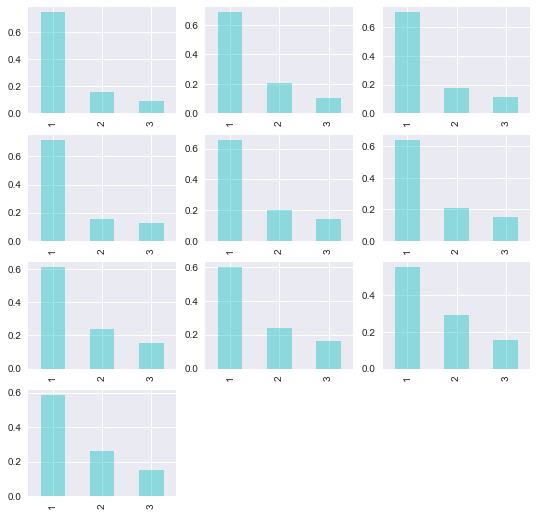

In [51]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
count_age20 = data_M20["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age20.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
count_age21 = data_M21["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age21.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
count_age22 = data_M22["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age22.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
count_age23 = data_M23["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age23.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
count_age24 = data_M24["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age24.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
count_age25 = data_M25["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age25.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
count_age26 = data_M26["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age26.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
count_age27 = data_M27["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age27.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
count_age28 = data_M28["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age28.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
count_age29 = data_M29["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age29.plot(kind = "bar",color="c", alpha=.4)

### 男性30代のaction_typeごとの割合

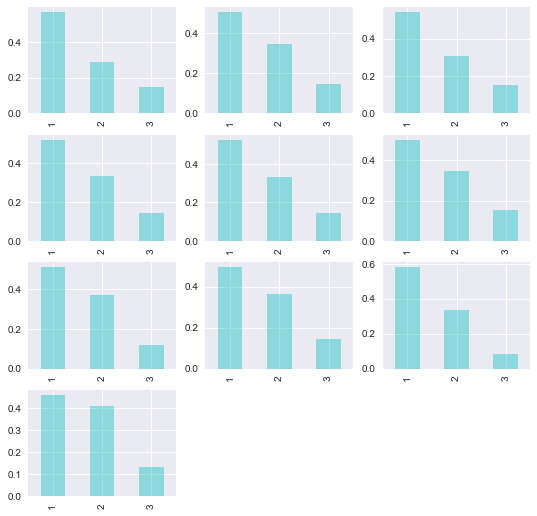

In [52]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
count_age30 = data_M30["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age30.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
count_age31 = data_M31["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age31.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
count_age32 = data_M32["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age32.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
count_age33 = data_M33["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age33.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
count_age34 = data_M34["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age34.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
count_age35 = data_M35["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age35.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
count_age36 = data_M36["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age36.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
count_age37 = data_M37["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age37.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
count_age38 = data_M38["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age38.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
count_age39 = data_M39["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age39.plot(kind = "bar",color="c", alpha=.4)

### 男性40代のaction_typeごとの割合

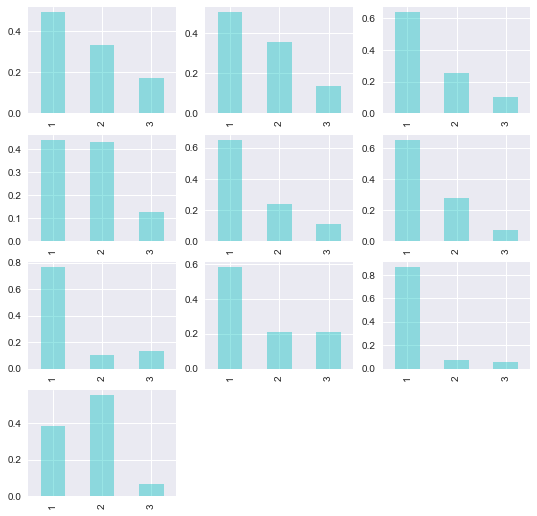

In [53]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
count_age40 = data_M40["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age40.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
count_age41 = data_M41["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age41.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
count_age42 = data_M42["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age42.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
count_age43 = data_M43["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age43.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
count_age44 = data_M44["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age44.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
count_age45 = data_M45["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age45.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
count_age46 = data_M46["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age46.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
count_age47 = data_M47["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age47.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
count_age48 = data_M48["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age48.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
count_age49 = data_M49["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age49.plot(kind = "bar",color="c", alpha=.4)

### 男性50代のaction_typeごとの割合

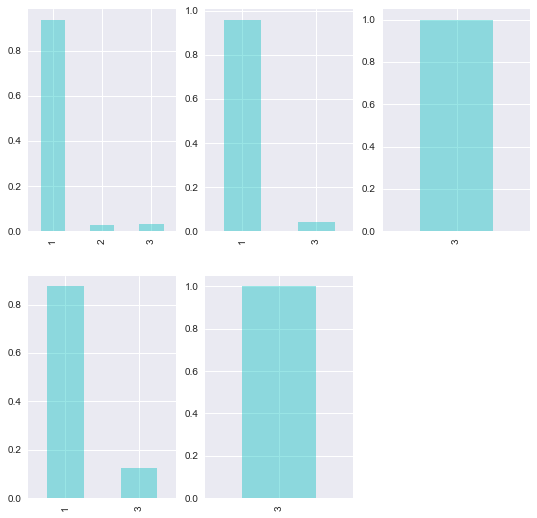

In [54]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(2,3,1)
count_age50 = data_M50["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age50.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(2,3,2)
count_age51 = data_M51["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age51.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(2,3,3)
count_age52 = data_M52["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age52.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(2,3,4)
count_age54 = data_M54["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age54.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(2,3,5)
count_age55 = data_M55["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_age55.plot(kind = "bar",color="c", alpha=.4)


# 女性の場合

### 女性20代のaction_typeごとの割合

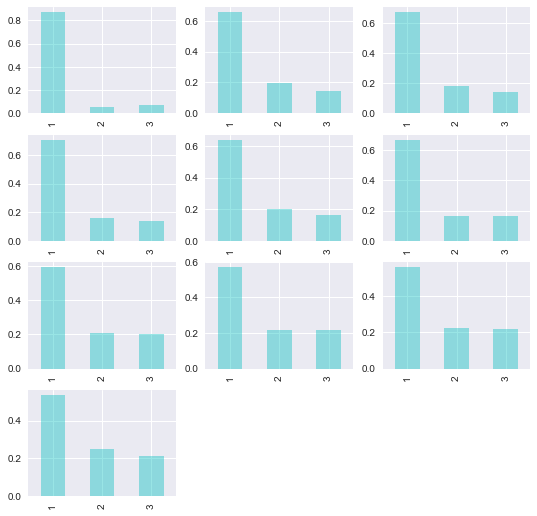

In [55]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
fcount_age20 = data_F20["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age20.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
fcount_age21 = data_F21["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age21.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
fcount_age22 = data_F22["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age22.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
fcount_age23 = data_F23["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age23.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
fcount_age24 = data_F24["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age24.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
fcount_age25 = data_F25["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age25.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
fcount_age26 = data_F26["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age26.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
fcount_age27 = data_F27["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age27.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
fcount_age28 = data_F28["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age28.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
fcount_age29 = data_F29["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age29.plot(kind = "bar",color="c", alpha=.4)

### 女性30代のaction_typeごとの割合

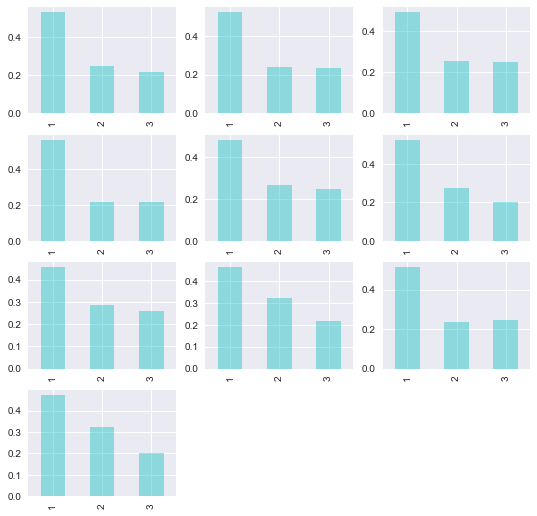

In [56]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
fcount_age30 = data_F30["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age30.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
fcount_age31 = data_F31["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age31.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
fcount_age32 = data_F32["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age32.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
fcount_age33 = data_F33["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age33.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
fcount_age34 = data_F34["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age34.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
fcount_age35 = data_F35["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age35.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
fcount_age36 = data_F36["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age36.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
fcount_age37 = data_F37["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age37.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
fcount_age38 = data_F38["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age38.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
fcount_age39 = data_F39["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age39.plot(kind = "bar",color="c", alpha=.4)

### 女性40代のaction_typeごとの割合

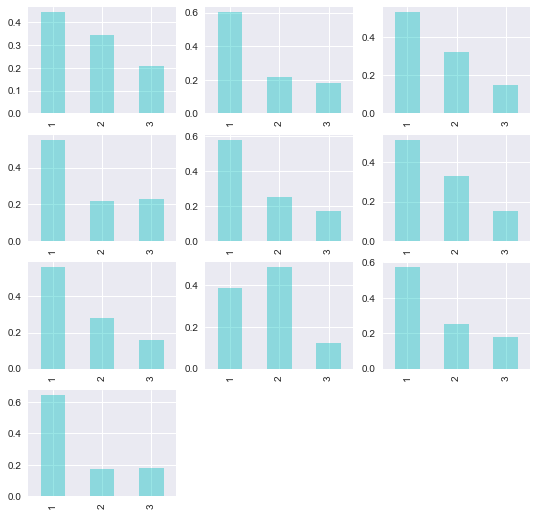

In [57]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
fcount_age40 = data_F40["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age40.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
fcount_age41 = data_F41["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age41.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
fcount_age42 = data_F42["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age42.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
fcount_age43 = data_F43["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age43.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
fcount_age44 = data_F44["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age44.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
fcount_age45 = data_F45["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age45.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
fcount_age46 = data_F46["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age46.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
fcount_age47 = data_F47["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age47.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
fcount_age48 = data_F48["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age48.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
fcount_age49 = data_F49["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age49.plot(kind = "bar",color="c", alpha=.4)

### 女性50代のaction_typeごとの割合

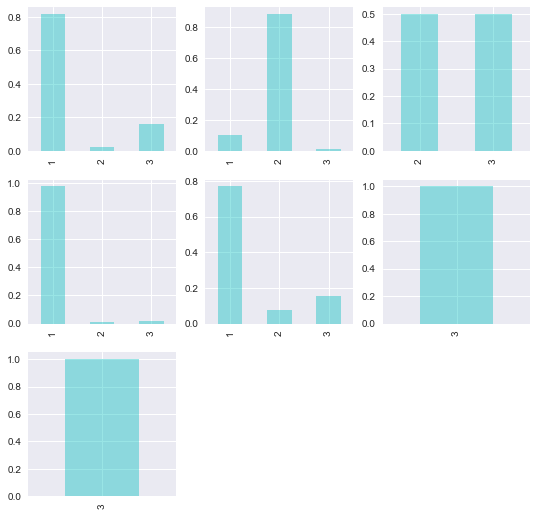

In [58]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(3,3,1)
fcount_age50 = data_F50["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age50.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,2)
fcount_age51 = data_F51["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age51.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,3)
fcount_age52 = data_F52["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age52.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,4)
fcount_age53 = data_F53["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age53.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,5)
fcount_age54 = data_F54["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age54.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,6)
fcount_age56 = data_F56["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age56.plot(kind = "bar",color="c", alpha=.4)
                  
plt.subplot(3,3,7)
fcount_age58 = data_F58["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_age58.plot(kind = "bar",color="c", alpha=.4)

#### eventの月ごとの比較

男女を月で分割

In [40]:
moji_1 = "data_M_month"
moji_2 ="= data_M[data_M['event_month'] == "
moji_3= "]"
for i in range(1,13):
    print (moji_1 + '%d'%i + moji_2 + '%d'%i + moji_3 ) 

print("")    

moji_1 = "data_F_month"
moji_2 ="= data_M[data_M['event_month'] == "
moji_3= "]"
for i in range(1,13):
    print (moji_1 + '%d'%i + moji_2 + '%d'%i + moji_3 ) 

data_M_month1= data_M[data_M['event_month'] == 1]
data_M_month2= data_M[data_M['event_month'] == 2]
data_M_month3= data_M[data_M['event_month'] == 3]
data_M_month4= data_M[data_M['event_month'] == 4]
data_M_month5= data_M[data_M['event_month'] == 5]
data_M_month6= data_M[data_M['event_month'] == 6]
data_M_month7= data_M[data_M['event_month'] == 7]
data_M_month8= data_M[data_M['event_month'] == 8]
data_M_month9= data_M[data_M['event_month'] == 9]
data_M_month10= data_M[data_M['event_month'] == 10]
data_M_month11= data_M[data_M['event_month'] == 11]
data_M_month12= data_M[data_M['event_month'] == 12]

data_F_month1= data_M[data_M['event_month'] == 1]
data_F_month2= data_M[data_M['event_month'] == 2]
data_F_month3= data_M[data_M['event_month'] == 3]
data_F_month4= data_M[data_M['event_month'] == 4]
data_F_month5= data_M[data_M['event_month'] == 5]
data_F_month6= data_M[data_M['event_month'] == 6]
data_F_month7= data_M[data_M['event_month'] == 7]
data_F_month8= data_M[data_M['event_month']

In [41]:
data_M_month1= data_M[data_M['event_month'] == 1]
data_M_month2= data_M[data_M['event_month'] == 2]
data_M_month3= data_M[data_M['event_month'] == 3]
data_M_month4= data_M[data_M['event_month'] == 4]
data_M_month5= data_M[data_M['event_month'] == 5]
data_M_month6= data_M[data_M['event_month'] == 6]
data_M_month7= data_M[data_M['event_month'] == 7]
data_M_month8= data_M[data_M['event_month'] == 8]
data_M_month9= data_M[data_M['event_month'] == 9]
data_M_month10= data_M[data_M['event_month'] == 10]
data_M_month11= data_M[data_M['event_month'] == 11]
data_M_month12= data_M[data_M['event_month'] == 12]

data_F_month1= data_M[data_M['event_month'] == 1]
data_F_month2= data_M[data_M['event_month'] == 2]
data_F_month3= data_M[data_M['event_month'] == 3]
data_F_month4= data_M[data_M['event_month'] == 4]
data_F_month5= data_M[data_M['event_month'] == 5]
data_F_month6= data_M[data_M['event_month'] == 6]
data_F_month7= data_M[data_M['event_month'] == 7]
data_F_month8= data_M[data_M['event_month'] == 8]
data_F_month9= data_M[data_M['event_month'] == 9]
data_F_month10= data_M[data_M['event_month'] == 10]
data_F_month11= data_M[data_M['event_month'] == 11]
data_F_month12= data_M[data_M['event_month'] == 12]

### 男性の月ごと

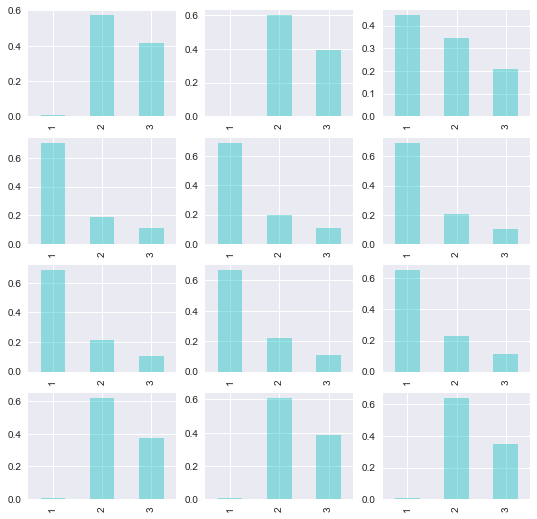

In [59]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
count_month1 = data_M_month1["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month1.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
count_month2 = data_M_month2["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month2.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
count_month3 = data_M_month3["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month3.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
count_month4 = data_M_month4["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month4.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
count_Mmonth5 = data_M_month5["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_Mmonth5.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
count_Mmonth6 = data_M_month6["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_Mmonth6.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
count_Mmonth7 = data_M_month7["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_Mmonth7.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
count_Mmonth8 = data_M_month8["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_Mmonth8.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
count_Mmonth9 = data_M_month9["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_Mmonth9.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
count_month10 = data_M_month10["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month10.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,11)
count_month11 = data_M_month11["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month11.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,12)
count_month12 = data_M_month12["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_month12.plot(kind = "bar",color="c", alpha=.4)

### 女性の月ごと

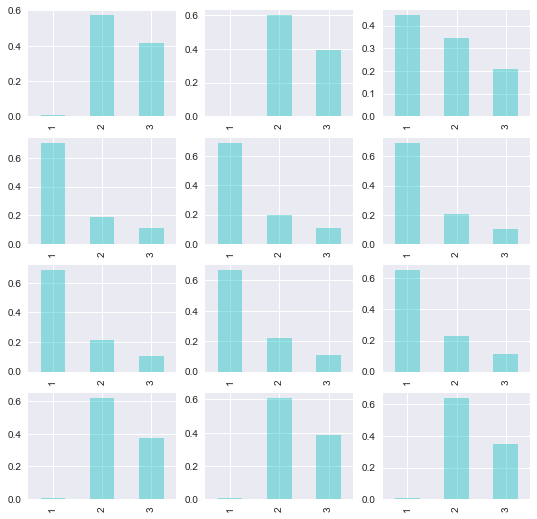

In [60]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,3,1)
fcount_month1 = data_F_month1["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month1.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,2)
fcount_month2 = data_F_month2["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month2.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,3)
fcount_month3 = data_F_month3["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month3.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,4)
fcount_month4 = data_F_month4["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month4.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,5)
fcount_Mmonth5 = data_F_month5["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_Mmonth5.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,6)
fcount_Mmonth6 = data_F_month6["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_Mmonth6.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,7)
fcount_Mmonth7 = data_F_month7["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_Mmonth7.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,8)
fcount_Mmonth8 = data_F_month8["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_Mmonth8.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,9)
fcount_Mmonth9 = data_F_month9["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_Mmonth9.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,10)
fcount_month10 = data_F_month10["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month10.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,11)
fcount_month11 = data_F_month11["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month11.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,3,12)
fcount_month12 = data_F_month12["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_month12.plot(kind = "bar",color="c", alpha=.4)

#### event開始時間ごとのaction_type比較

In [44]:
data_M.columns

Index(['male_age_lower', 'age', 'event_weekday', 'male_price',
       'female_age_upper', 'female_price', 'event_day', 'user_year',
       'female_age_lower', 'user_month', 'event_month', 'event_hour',
       'action_type', 'male_age_upper', 'event_year', 'gender',
       'event_prefecture', 'user_prefecture'],
      dtype='object')

In [45]:
print(data_M["event_hour"].value_counts(dropna=False, normalize=False).sort_index())  #20~55最の36通りデータ分割

0        116
7         15
8         17
9       5122
10      5648
11     15459
12     55278
13    103503
14    135992
15     43337
16     26777
17     44677
18     54181
19    158452
20     51958
21      1436
22       342
23        52
Name: event_hour, dtype: int64


In [46]:
data_M_hour0= data_M[data_M['event_hour'] == 0]
data_M_hour7= data_M[data_M['event_hour'] == 7]
data_M_hour8= data_M[data_M['event_hour'] == 8]
data_M_hour9= data_M[data_M['event_hour'] == 9]
data_M_hour10= data_M[data_M['event_hour'] == 10]
data_M_hour11= data_M[data_M['event_hour'] == 11]
data_M_hour12= data_M[data_M['event_hour'] == 12]
data_M_hour13= data_M[data_M['event_hour'] == 13]
data_M_hour14= data_M[data_M['event_hour'] == 14]
data_M_hour15= data_M[data_M['event_hour'] == 15]
data_M_hour16= data_M[data_M['event_hour'] == 16]
data_M_hour17= data_M[data_M['event_hour'] == 17]
data_M_hour18= data_M[data_M['event_hour'] == 18]
data_M_hour19= data_M[data_M['event_hour'] == 19]
data_M_hour20= data_M[data_M['event_hour'] == 20]
data_M_hour21= data_M[data_M['event_hour'] == 21]
data_M_hour22= data_M[data_M['event_hour'] == 22]
data_M_hour23= data_M[data_M['event_hour'] == 23]

data_F_hour0= data_F[data_F['event_hour'] == 0]
data_F_hour7= data_F[data_F['event_hour'] == 7]
data_F_hour8= data_F[data_F['event_hour'] == 8]
data_F_hour9= data_F[data_F['event_hour'] == 9]
data_F_hour10= data_F[data_F['event_hour'] == 10]
data_F_hour11= data_F[data_F['event_hour'] == 11]
data_F_hour12= data_F[data_F['event_hour'] == 12]
data_F_hour13= data_F[data_F['event_hour'] == 13]
data_F_hour14= data_F[data_F['event_hour'] == 14]
data_F_hour15= data_F[data_F['event_hour'] == 15]
data_F_hour16= data_F[data_F['event_hour'] == 16]
data_F_hour17= data_F[data_F['event_hour'] == 17]
data_F_hour18= data_F[data_F['event_hour'] == 18]
data_F_hour19= data_F[data_F['event_hour'] == 19]
data_F_hour20= data_F[data_F['event_hour'] == 20]
data_F_hour21= data_F[data_F['event_hour'] == 21]
data_F_hour22= data_F[data_F['event_hour'] == 22]
data_F_hour23 =data_F[data_F['event_hour'] == 23]

男性のイベント開始時間

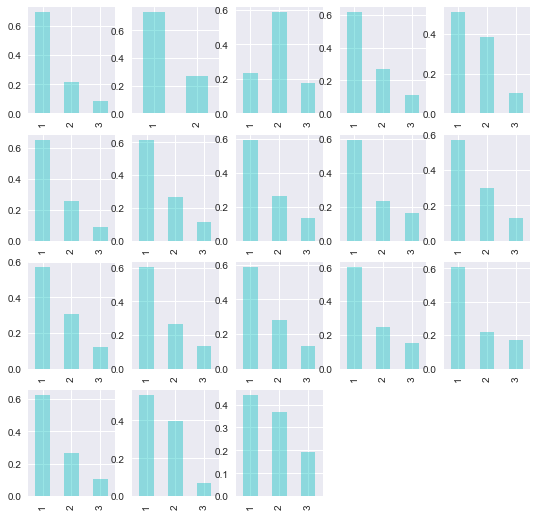

In [61]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,5,1)
count_M_hour0 =data_M_hour0["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour0.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,2)
count_M_hour7 = data_M_hour7["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour7.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,3)
count_M_hour8 = data_M_hour8["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour8.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,4)
count_M_hour9 = data_M_hour9["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour9.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,5)
count_M_hour10 = data_M_hour10["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour10.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,6)
count_M_hour11 =data_M_hour11["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour11.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,7)
count_M_hour12 = data_M_hour12["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour12.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,8)
count_M_hour13 =data_M_hour13["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour13.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,9)
count_M_hour14 = data_M_hour14["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour14.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,10)
count_M_hour15= data_M_hour15["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour15.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,11)
count_M_hour16= data_M_hour16["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour16.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,12)
count_M_hour17 = data_M_hour17["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour17.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,13)
count_M_hour18 =data_M_hour18["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour18.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,14)
count_M_hour19 = data_M_hour19["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour19.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,15)
count_M_hour20= data_M_hour20["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour20.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,16)
count_M_hour21= data_M_hour21["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour21.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,17)
count_M_hour22 = data_M_hour22["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour22.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,18)
count_M_hour23 = data_M_hour23["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_M_hour23.plot(kind = "bar",color="c", alpha=.4)

女性のイベント開始時間ごとのaction_type

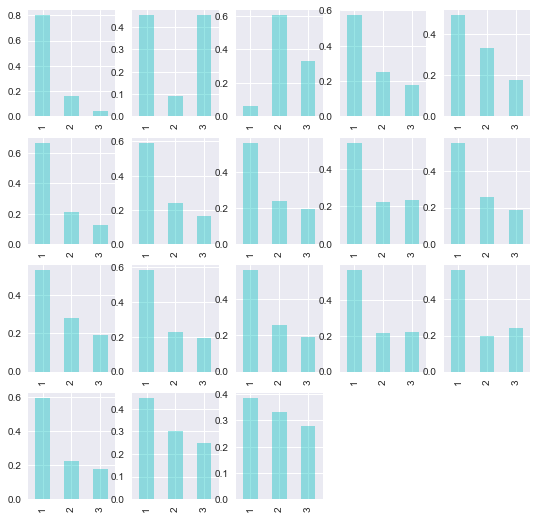

In [62]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(4,5,1)
count_F_hour0 =data_F_hour0["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour0.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,2)
count_F_hour7 = data_F_hour7["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour7.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,3)
count_F_hour8 = data_F_hour8["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour8.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,4)
count_F_hour9 = data_F_hour9["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour9.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,5)
count_F_hour10 = data_F_hour10["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour10.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,6)
count_F_hour11 =data_F_hour11["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour11.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,7)
count_F_hour12 = data_F_hour12["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour12.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,8)
count_F_hour13 =data_F_hour13["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour13.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,9)
count_F_hour14 = data_F_hour14["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour14.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,10)
count_F_hour15= data_F_hour15["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour15.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,11)
count_F_hour16= data_F_hour16["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour16.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,12)
count_F_hour17 = data_F_hour17["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour17.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,13)
count_F_hour18 =data_F_hour18["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour18.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,14)
count_F_hour19 = data_F_hour19["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour19.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,15)
count_F_hour20= data_F_hour20["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour20.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,16)
count_F_hour21= data_F_hour21["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour21.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,17)
count_F_hour22 = data_F_hour22["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour22.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(4,5,18)
count_F_hour23 = data_F_hour23["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_F_hour23.plot(kind = "bar",color="c", alpha=.4)

#### event曜日ごとのaction_type=３ 比較（日曜日=0）

In [66]:
data_M_weekday0= data_M[data_M['event_weekday'] == 0]
data_M_weekday1= data_M[data_M['event_weekday'] == 1]
data_M_weekday2= data_M[data_M['event_weekday'] == 2]
data_M_weekday3= data_M[data_M['event_weekday'] == 3]
data_M_weekday4= data_M[data_M['event_weekday'] == 4]
data_M_weekday5= data_M[data_M['event_weekday'] == 5]
data_M_weekday6= data_M[data_M['event_weekday'] == 6]

data_F_weekday0= data_F[data_F['event_weekday'] == 0]
data_F_weekday1= data_F[data_F['event_weekday'] == 1]
data_F_weekday2= data_F[data_F['event_weekday'] == 2]
data_F_weekday3= data_F[data_F['event_weekday'] == 3]
data_F_weekday4= data_F[data_F['event_weekday'] == 4]
data_F_weekday5= data_F[data_F['event_weekday'] == 5]
data_F_weekday6= data_F[data_F['event_weekday'] == 6]

男性のイベント曜日ごとのaction_typeの影響

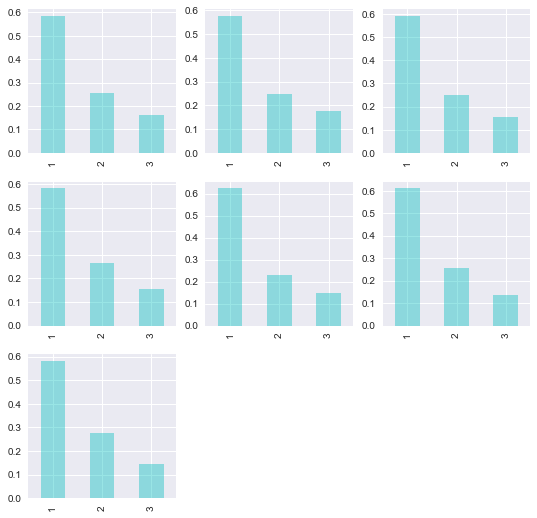

In [67]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(3,3,1)
count_weekday0 = data_M_weekday0["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday0.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,2)
count_weekday1 = data_M_weekday1["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday1.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,3)
count_weekday2 = data_M_weekday2["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday2.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,4)
count_weekday3 = data_M_weekday3["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday3.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,5)
count_weekday4 = data_M_weekday4["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday4.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,6)
count_weekday5 = data_M_weekday5["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday5.plot(kind = "bar",color="c", alpha=.4)
                  
plt.subplot(3,3,7)
count_weekday6 = data_M_weekday6["action_type"].value_counts(dropna=False, normalize=True).sort_index()
count_weekday6.plot(kind = "bar",color="c", alpha=.4)

女性のイベント曜日ごとのaction_typeの影響

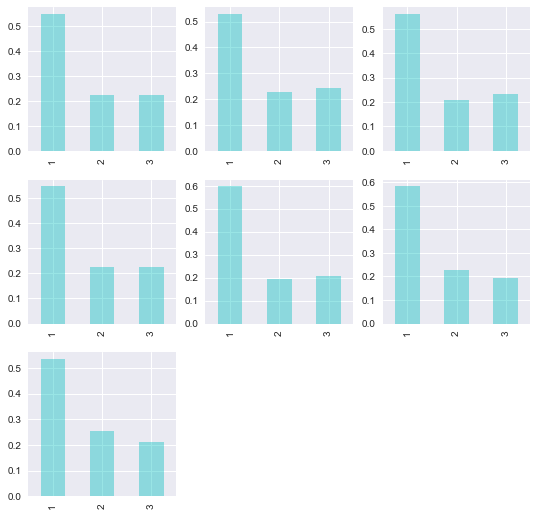

In [68]:
fig = plt.figure(figsize=(9,9)) # figureオブジェクト作成
plt.subplot(3,3,1)
fcount_weekday0 = data_F_weekday0["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday0.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,2)
fcount_weekday1 = data_F_weekday1["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday1.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,3)
fcount_weekday2 = data_F_weekday2["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday2.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,4)
fcount_weekday3 = data_F_weekday3["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday3.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,5)
fcount_weekday4 = data_F_weekday4["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday4.plot(kind = "bar",color="c", alpha=.4)

plt.subplot(3,3,6)
fcount_weekday5 = data_F_weekday5["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday5.plot(kind = "bar",color="c", alpha=.4)
                  
plt.subplot(3,3,7)
fcount_weekday6 = data_F_weekday6["action_type"].value_counts(dropna=False, normalize=True).sort_index()
fcount_weekday6.plot(kind = "bar",color="c", alpha=.4)

# ここまで作成

# userとeventの地域の関係を調べる

#### event地域ごとのaction_type=３ 比較

 ["北海道","青森県","岩手県","宮城県","秋田県", 5
"山形県", "福島県", "茨城県","栃木県","群馬県", 10
"埼玉県","千葉県","東京都","神奈川県","新潟県", 15
"富山県","石川県","福井県","山梨県","長野県", 20
"岐阜県","静岡県","愛知県","三重県","滋賀県", 25
"京都府","大阪府","兵庫県","奈良県","和歌山県", 30
"鳥取県","島根県","岡山県","広島県","山口県", 35
"徳島県","香川県","愛媛県","高知県","福岡県", 40
"佐賀県","長崎県","熊本県","大分県","宮崎県", 45
  "鹿児島県","沖縄県",'その他（海外等）']     48

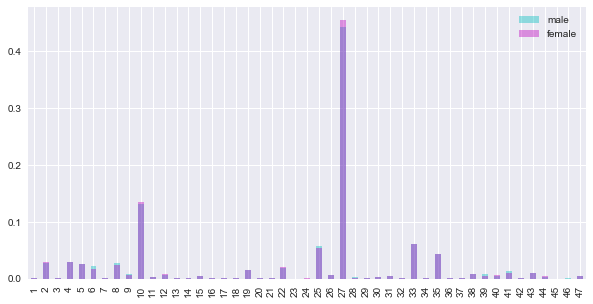

In [40]:
fig = plt.figure(figsize=(10,5)) # figureオブジェクト作成

count_age3 = male3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
count_age3.plot(kind = "bar",color="c", alpha=.4)

fcount_age3 = female3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
fcount_age3.plot(kind = "bar",color="m", alpha=.4)

#Count_age3 = data3['event_prefecture'].value_counts(dropna=False, normalize=True).sort_index()
#Count_age3.plot(kind = "bar",color="k", alpha=.4)

plt.legend(["male","female","all"]) # 凡例を表示

LAbelEncorderの順番付けが謎　東京:27　10:大阪　25:愛知 33:神奈川　35:福岡 19:岡山 22:広島 2:京都　4:兵庫　5:北海道 6:千葉 8:埼玉　

#### user地域とevent地域の散布図　action_type=3

In [48]:
scatter_data3 = data3.loc[:,['event_prefecture','user_prefecture']]
scatter_data3.head()

,event_prefecture,user_prefecture
0,27,43
1279,8,43
1280,8,43
1281,8,43
1282,8,43


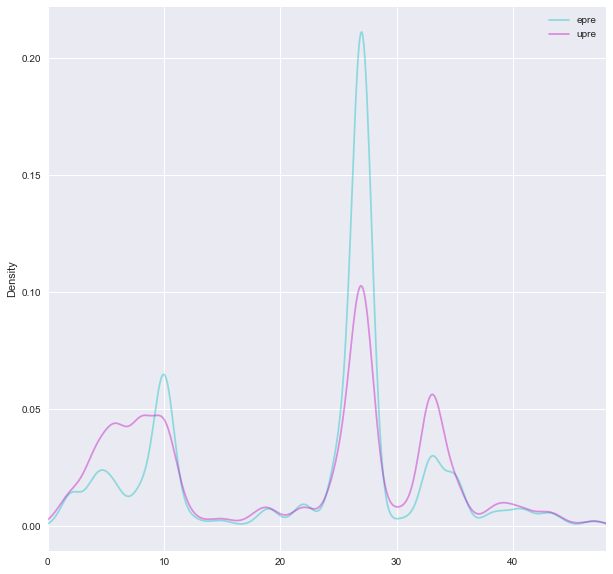

In [171]:
fig = plt.figure(figsize=(10,10)) # figureオブジェクト作成
count_epre = scatter_data3['event_prefecture']
count_epre.plot(kind = "kde",color="c", alpha=.4)

count_upre = scatter_data3['user_prefecture']
count_upre.plot(kind = "kde",color="m", alpha=.4)

plt.xlim(0,48)
plt.legend(["epre","upre"]) # 凡例を表示

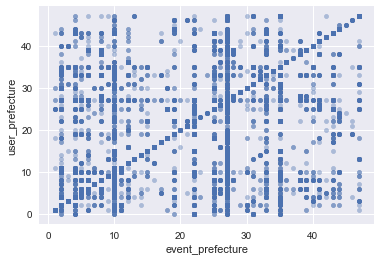

In [63]:
fig = plt.figure(figsize=(20,20)) # figureオブジェクト作成
scatter_data3.plot.scatter(x="event_prefecture",y="user_prefecture",alpha=.4)